# Comparing MTO data to Turning Movement Counts
Overlaps between TMC and MTO data occur when one leg of the intersection is a high way ramp. This notebook looks at turning movement counts done on all the 400 series highway ramps after 2010.

In [1]:
%matplotlib inline
from utilities import get_sql_results
from utilities import db_connect
from matplotlib import pyplot as plt
import cl_fcn
db = db_connect()

The original plan was to extract counts done on the same day for a side-by-side comparison. Unfortunately, MTO data coverage on ramps was very sparse until recently. Therefore, different days were used to compare. In the meantime, day of week and season of the year are perserved as much as possible. Therefore, although not necessarily the same, the volumes should be comparable.

In [2]:
centreline_id = [444846,444846,444486,30011544,442060,439727,439420,108375,106023,20154557,13502825,445968,436232,436232,436232]
detector_id = ['401DE0020DSR','401DE0020DSR','401DE0060DNR','401DE0310DSR','401DE0350DNR','401DE0410DSR','401DE0450DNR','401DE0700DNR','401DE0980DSR','401DE1080DNR','401DE1140DNR','401DW0150DSR','404DN0060DNR','404DN0060DNR','404DN0060DNR']
count_date_tmc = ['2011-06-02','2016-03-08','2016-03-08','2011-10-17','2011-11-08','2011-06-13','2011-05-17','2010-11-23','2012-11-26','2011-06-20','2015-11-24','2010-11-24','2010-12-14','2013-06-07','2017-03-23']
count_date_mto = ['2016-06-27','2016-04-18','2016-03-08','2016-10-17','2013-11-12','2015-06-15','2015-05-19','2013-11-26','2017-05-22','2015-06-22','2016-11-23','2014-11-26','2015-12-15','2015-06-05','2017-03-23']

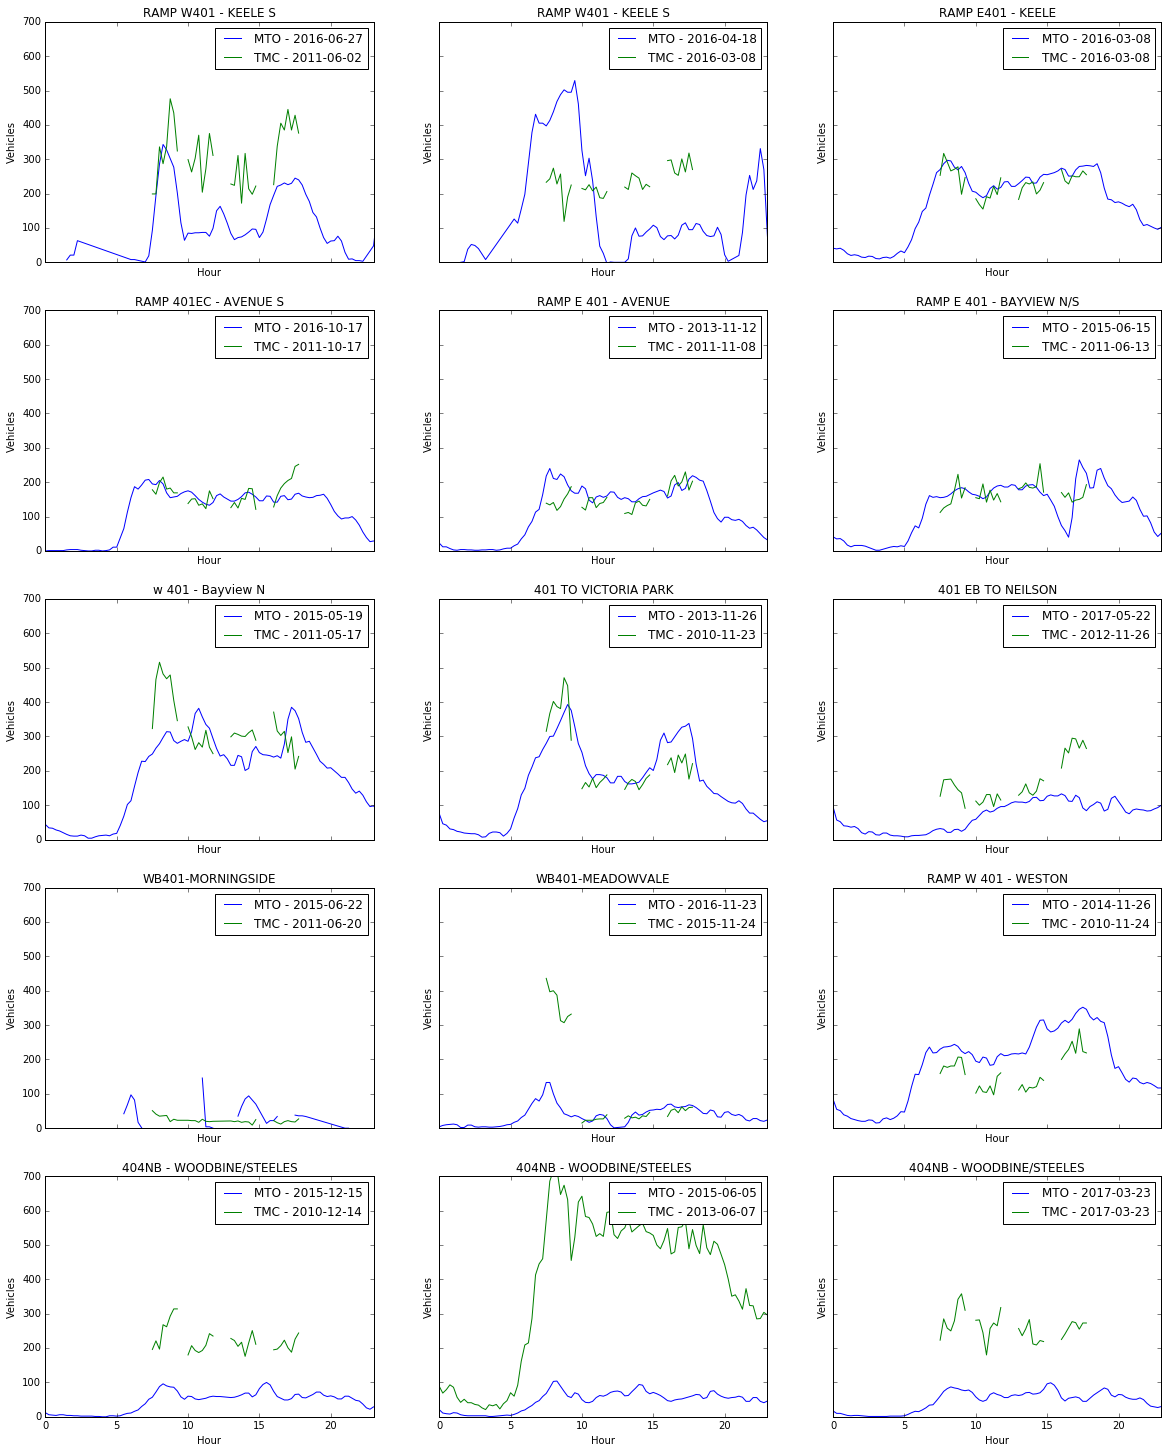

In [5]:
fig, axes = plt.subplots(5,3, figsize = (20,25), sharex = True, sharey = True)
i = 0
for ci, di, cdm, cdt in zip(centreline_id, detector_id, count_date_mto, count_date_tmc):
    counts = get_sql_results(db, 'query-mto-tmc-comparison.sql', \
                             columns = ['hwy_name','loc_desc','time_15','mto_vol','tmc_vol'], parameters=[di, cdm, ci, cdt])
    axes[int(i/3)][i%3].plot(list(counts['time_15']/4),list(counts['mto_vol']), label='MTO - ' + cdm)
    axes[int(i/3)][i%3].plot(list(counts['time_15']/4),list(counts['tmc_vol']), label='TMC - ' + cdt)
    axes[int(i/3)][i%3].set_xlim([0,23])
    axes[int(i/3)][i%3].set_ylim([0,700])
    if  counts['loc_desc'][0].find(counts['hwy_name'][0]) >= 0:
        axes[int(i/3)][i%3].set_title(counts['loc_desc'][0])
    else:
        axes[int(i/3)][i%3].set_title(counts['hwy_name'][0] + ' '+ counts['loc_desc'][0])
    axes[int(i/3)][i%3].legend()
    axes[int(i/3)][i%3].set_xlabel('Hour')
    axes[int(i/3)][i%3].set_ylabel('Vehicles')
    i = i + 1

## Observations
About half the time the volumes line up. 

1. the last row represents the same detector on different days; middle column is an ATR count. In this case, TMC, ATR, and MTO counts are consistently on different number scales. Reasons need to be investigated.
2. When MTO counts are not continuous, the counts hardly make sense and need to be deleted.

In [ ]:
db.close()